# __HOUSING: PRICE PREDICTION__

## __Problem Statement:__

### __First I am importing some important libraries__

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading the train.csv dataset

In [4]:
data = pd.read_csv('train.csv')

## __First I will do some EDA ( Exploratory Data Analysis )__

In [391]:
# pd.options.display.max_columns = 82



In [3]:
pwd

'/Users/olivierla412/Downloads/Project-Housing_splitted'

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [6]:
data.shape

(1168, 81)

#### from the above code we can see that how dataset has (1168 rows , 81 columns)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

#### From __data.info()__ we can see that some columns have numerical data and some have text data

In [8]:
## this will help me display all the columns

pd.options.display.max_columns = 100

In [9]:
data.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,879,879,GasA,Ex,Y,SBrkr,879,984,0,1863,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2006.0,Fin,3,660,TA,TA,Y,100,17,0,0,0,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210


In [10]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

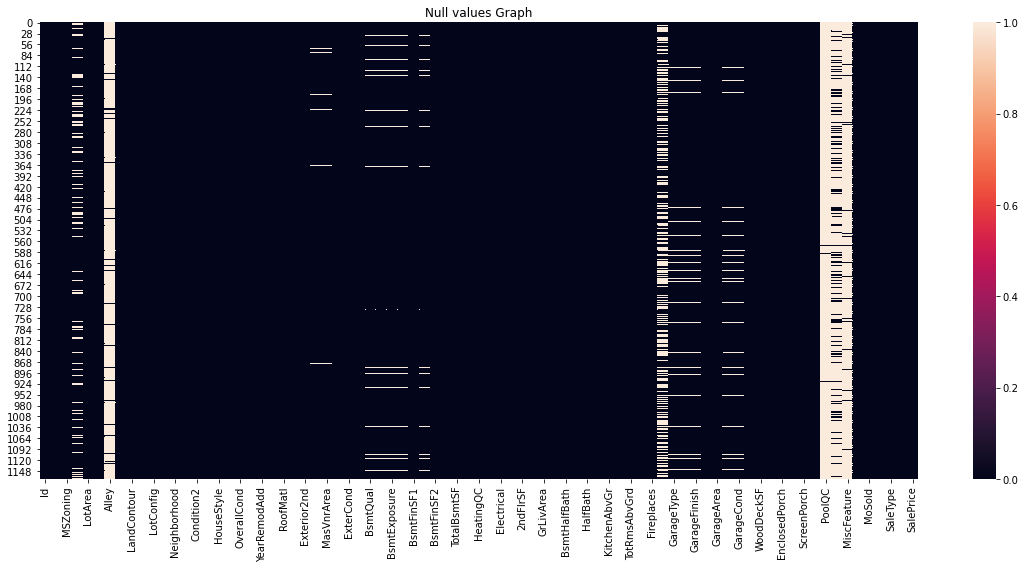

In [13]:
plt.figure(figsize=(16,8))
sns.heatmap(data.isna())
plt.title("Null values Graph")
plt.tight_layout()

### the white line show the NaN values.. more white line means more nan values in that column..
### -------

### From __data.isna().sum()__ some columns having missing(NaN) values greater than 40%  so I should delete them. and the Id column also because nominal data.

In [14]:
## removing columns having NaN count greater than 40% .

data.drop(columns=data[['Id','Alley','PoolQC','MiscFeature','Fence','FireplaceQu']],axis=1,inplace=True)

In [15]:
data.shape


(1168, 75)

### Now we have 75 columns we should deal with..

In [170]:
## pd.set_option('display.max.rows',None)


# the code above will help me to see all the rows

In [16]:
## This will help to statistical description of the numerical data

data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
data.shape

(1168, 75)

In [18]:
data.describe().columns


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [19]:
numerical_values = data.describe().columns
numerical_values.shape

(37,)

#### From __data.describe()__ and __numerical_values.shape__ we say that there are 37 columns having Numerical data 

### First I will seperate or split  our Dataset into two groups __Numerical__ data and __Non-numerical data__ 
#### Numeric_data __and__ Non_Numeric_data

In [20]:
## Non-numerical data are given by:

non_num_data = data.drop(columns=data[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice']])

In [21]:
non_num_data.shape

(1168, 38)

#### We can see that for __non numerical data__ we have 38 columns

In [22]:
# numerical data are given by:
num_data = data.drop(non_num_data,axis=1)

In [23]:
num_data.shape

(1168, 37)

#### We can see that for __numerical data__ we have 37 columns

## __I will deal with splited datasets seperatetly  and  at the end concatinate them__
## __Ex: df_col = pd.concat([df_1,df_2], axis=1)__

In [24]:
## let's check the NaN values in the sum numerical data

num_data.isna().sum()

MSSubClass         0
LotFrontage      214
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         7
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       64
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

#### we see that 3 columns from numerical data having NAN values.
####

## 1. Let's fill the NaN values in the __numeric_data__

#### Only these clomns: __LotFrontage , MasVnrArea, GarageYrBlt__ have missing values(__NaN__), and all have continuous data

####
####  I will do SimpleImputer to fill the nan because they are  continuous data.... 


In [25]:
# import the libraries
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [29]:
# instantiate it first
simp = SimpleImputer()


In [30]:
mct = make_column_transformer(
    (simp,['LotFrontage','MasVnrArea','GarageYrBlt']),
    remainder='passthrough')

In [32]:
numeric_data_clearned = mct.fit_transform(num_data)

In [33]:
numeric_data_clearned

array([[7.09884696e+01, 0.00000000e+00, 1.97700000e+03, ...,
        2.00000000e+00, 2.00700000e+03, 1.28000000e+05],
       [9.50000000e+01, 0.00000000e+00, 1.97000000e+03, ...,
        1.00000000e+01, 2.00700000e+03, 2.68000000e+05],
       [9.20000000e+01, 0.00000000e+00, 1.99700000e+03, ...,
        6.00000000e+00, 2.00700000e+03, 2.69790000e+05],
       ...,
       [2.40000000e+01, 0.00000000e+00, 1.97600000e+03, ...,
        7.00000000e+00, 2.00900000e+03, 1.48500000e+05],
       [5.00000000e+01, 0.00000000e+00, 1.92000000e+03, ...,
        7.00000000e+00, 2.00800000e+03, 4.00000000e+04],
       [7.09884696e+01, 0.00000000e+00, 2.00200000e+03, ...,
        6.00000000e+00, 2.00600000e+03, 1.83200000e+05]])

#### let's get the columns indexes first then we can replace them by they new filling values

#### Since __numeric_data_clearned__ and __num_data__ have the same __shape__ can run a for loop

In [34]:
my_array = ['LotFrontage','MasVnrArea','GarageYrBlt']
arr_loc_index = []
for x in my_array:
    arr_loc_index.append(num_data.columns.get_loc(x))
    
arr_loc_index

[1, 7, 24]


#### we see that the 3 columns have indexes [1, 7, 24]..
####

In [36]:
## Let's update nan in  the num_data with the new filled values...

num_data['LotFrontage'] = numeric_data_clearned[:,0]
num_data['MasVnrArea']  =  numeric_data_clearned[:,7]
num_data['GarageYrBlt'] = numeric_data_clearned[:,24]

num_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,120,70.98847,4928,6,5,1976,1976,1976.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,1.0,2,440,0,205,0,0,0,0,0,2,2007,128000
1,20,95.00000,15865,8,6,1970,1970,1970.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,1.0,2,621,81,207,0,0,224,0,0,10,2007,268000
2,60,92.00000,9920,7,5,1996,1997,1996.0,862,0,255,1117,1127,886,0,2013,1,0,2,1,3,1,8,1,1.0,2,455,180,130,0,0,0,0,0,6,2007,269790
3,20,105.00000,11751,6,6,1977,1977,1977.0,705,0,1139,1844,1844,0,0,1844,0,0,2,0,3,1,7,1,1.0,2,546,0,122,0,0,0,0,0,1,2010,190000
4,20,70.98847,16635,6,7,1977,2000,1977.0,1246,0,356,1602,1602,0,0,1602,0,1,2,0,3,1,8,1,1.0,2,529,240,0,0,0,0,0,0,6,2009,215000


In [37]:
## Let's verify the NaN values are filled 

num_data.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

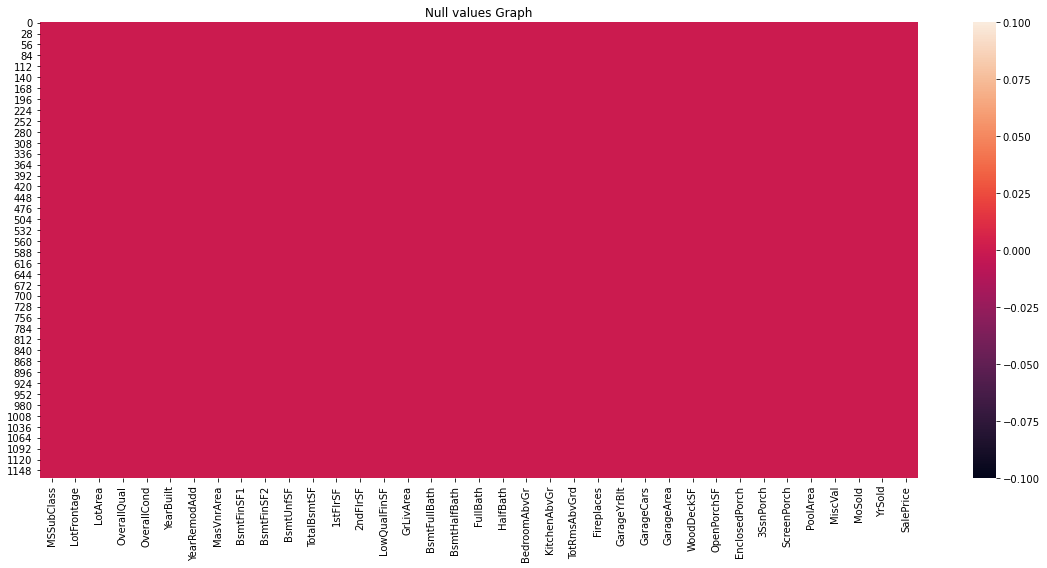

In [38]:
## let's it and see the visualiztion

plt.figure(figsize=(16,8))
sns.heatmap(num_data.isna())
plt.title("Null values Graph")
plt.tight_layout()

### all is red , this mean , there no missing values
### -------------


## 2.1 Let's __fill NaN and  revoved the column having more 40% NaN__ non_num_data

In [39]:
non_num_data.isna().sum()
#data_non_num.info()


MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        7
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         30
BsmtCond         30
BsmtExposure     31
BsmtFinType1     30
BsmtFinType2     31
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
KitchenQual       0
Functional        0
GarageType       64
GarageFinish     64
GarageQual       64
GarageCond       64
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [40]:
## let fill the NaN the nearest value 
non_num_data.BsmtQual.value_counts()


TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [41]:
non_num_data.BsmtCond.value_counts()

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

In [42]:
non_num_data.BsmtExposure.value_counts()

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

In [43]:
non_num_data.BsmtFinType1.value_counts()

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

In [44]:
non_num_data.BsmtFinType2.value_counts()

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [45]:
non_num_data.GarageType.value_counts()

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [46]:
non_num_data.GarageFinish.value_counts()

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64

In [204]:
non_num_data.GarageQual.value_counts()

TA    1050
Fa      39
Gd      11
Po       2
Ex       2
Name: GarageQual, dtype: int64

In [47]:
non_num_data.GarageCond.value_counts()

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

####
#### BsmtCond, BsmtFinType2, BsmtExposure, GarageType, GarageQual, GarageCond,MasVnrType
### for these columns  i will fill  them by the __mod value__:

In [48]:

# BsmtCond, BsmtFinType2, BsmtExposure, GarageType, GarageQual, GarageCond,MasVnrType

## for these columns i will fill them by the mod value beacause the repesctive values
## are the mod in thsese columns.

non_num_data =non_num_data.fillna({
    'BsmtCond':'TA',
    'BsmtFinType2':'Unf',
    'BsmtExposure':'No',
    'GarageType':'Attchd',
    'GarageQual':'TA',
    'GarageCond':'TA',
    'MasVnrType':'None'
})



####
#### BsmtQual ,BsmtFinType1 , GarageFinish,
#### for these columns i will be filling using __ffill (forward fill method)__.

In [49]:
## for these columns i will fill them using forward 
## fill because there are some kind balance for the value_counts.

non_num_data['BsmtQual'] = non_num_data.fillna(method="ffill")
non_num_data['BsmtFinType1'] = non_num_data.fillna(method="ffill")
non_num_data['GarageFinish'] = non_num_data.fillna(method="ffill")

In [50]:
## let's verify NaN values are filled 

non_num_data.isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

##
## 2.2 Let's __ENCODER non_num_data__

### We have two kind of Categorical: __Categorical unscalable__ and __Categorical scalable__

##
## Let's seperate the non_num_data into two

## __1 scalable  or measurable data.__

In [51]:
## by personal Analysis I have found out these columns are scalable.

## From these code we will the scalable  or measurable data and store them
## in scable_data

scable_data = non_num_data.drop(['MSZoning','LandContour','LotConfig','LandSlope', 'Neighborhood',
                'Condition1', 'Condition2','BldgType','Exterior1st', 'Exterior2nd',
                'SaleCondition','Functional','GarageType','SaleType','RoofStyle','RoofMatl'],axis=1)



In [52]:
scable_data.head()

,Street,LotShape,Utilities,HouseStyle,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive
0,Pave,IR1,AllPub,1Story,None,TA,TA,CBlock,RL,TA,No,RL,Unf,GasA,TA,Y,SBrkr,TA,RL,TA,TA,Y
1,Pave,IR1,AllPub,1Story,None,Gd,Gd,PConc,RL,Gd,Gd,RL,Rec,GasA,Ex,Y,SBrkr,Gd,RL,TA,TA,Y
2,Pave,IR1,AllPub,2Story,None,Gd,TA,PConc,RL,TA,Av,RL,Unf,GasA,Ex,Y,SBrkr,TA,RL,TA,TA,Y
3,Pave,IR1,AllPub,1Story,BrkFace,TA,TA,CBlock,RL,TA,No,RL,Unf,GasA,Ex,Y,SBrkr,TA,RL,TA,TA,Y
4,Pave,IR1,AllPub,1Story,Stone,Gd,TA,CBlock,RL,TA,No,RL,Unf,GasA,Gd,Y,SBrkr,Gd,RL,TA,TA,Y


## __2 unscalable  or unmeasurable data__

In [53]:
## by personal Analysis I have found out these columns are unscalable.

## From these code we will the unscalable  or unmeasurable data and store them
## in unscable_data

unscable_data = non_num_data.drop(scable_data,axis=1)


In [54]:
unscable_data.head()

,MSZoning,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Functional,GarageType,SaleType,SaleCondition
0,RL,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,Gable,CompShg,Plywood,Plywood,Typ,Attchd,WD,Normal
1,RL,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,Flat,Tar&Grv,Wd Sdng,Wd Sdng,Typ,Attchd,WD,Normal
2,RL,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,Gable,CompShg,MetalSd,MetalSd,Typ,Attchd,WD,Normal
3,RL,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,Hip,CompShg,Plywood,Plywood,Typ,Attchd,COD,Normal
4,RL,Lvl,FR2,Gtl,NWAmes,Norm,Norm,1Fam,Gable,CompShg,CemntBd,CmentBd,Typ,Attchd,WD,Normal


In [55]:
unscable_data.shape

(1168, 16)

## 
## __Categorical unscalable__ :
#### we cannot measure them and see which one is greater and which one is the smallest.
## we will  used __LabelEncoder__ to encoder them.


In [56]:
## import the libraries

from sklearn.preprocessing import LabelEncoder
                

In [57]:
# unscable_data

unscable_data_num = unscable_data.apply(LabelEncoder().fit_transform)

In [58]:
unscable_data_num.head()

,MSZoning,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Functional,GarageType,SaleType,SaleCondition
0,3,3,4,0,13,2,2,4,1,1,8,9,6,1,8,4
1,3,3,4,1,12,2,2,0,0,5,12,13,6,1,8,4
2,3,3,1,0,15,2,2,0,1,1,7,7,6,1,8,4
3,3,3,4,0,14,2,2,0,3,1,8,9,6,1,0,4
4,3,3,2,0,14,2,2,0,1,1,4,4,6,1,8,4


##
##
## __scalable  or measurable data__

In [59]:
from sklearn.preprocessing import OrdinalEncoder


#### .For those which have ordered categorical measurable  like (first, second ,third ,.... I will used __OrdinalEncoder__ to encoder them.
####

In [60]:
scable_data.Utilities.unique()

## here we got a unique values for all the records so will drop
## the Utilities because it cannot have any effect


array(['AllPub'], dtype=object)

In [437]:
# scable_data.Utilities

In [61]:
scable_data.drop('Utilities', axis=1, inplace=True)


In [62]:
scable_data.columns.shape

(21,)

In [63]:
## This help to identify the unique element in column.

scable_data.GarageCond.unique()

array(['TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

In [64]:
scable_data.columns

Index(['Street', 'LotShape', 'HouseStyle', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive'],
      dtype='object')

In [65]:
## here I am ordering the categorical in ascending order in ordinalencoder
## and encoder all at time

ord_enc = OrdinalEncoder(categories= [['Pave','Grvl'],
                                      ['IR3','IR2','IR1','Reg'],
                                      ['2Story','2.5Unf','2.5Fin','1Story','1.5Unf','1.5Fin','SFoyer','SLvl'],
                                      ['None', 'BrkFace', 'Stone', 'BrkCmn'],
                                      ['Fa','TA','Gd','Ex'],
                                      ['Po','Fa','TA','Gd','Ex'],
                                      ['Wood','CBlock','Stone','Slab','BrkTil','PConc'],
                                      ['FV','C (all)','RL','RM','RH'],
                                      ['Po','Fa','TA','Gd'],
                                      ['No','Mn','Av','Gd'],
                                      ['FV','C (all)','RL','RM','RH'],
                                      ['Unf','LwQ','Rec','ALQ','BLQ','GLQ'],
                                      ['GasA', 'GasW', 'Floor', 'OthW', 'Wall', 'Grav'],
                                      ['Po','Fa','TA','Gd','Ex'],
                                      ['Y', 'N'],
                                      ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'],
                                      ['Fa','TA','Gd','Ex'],
                                      ['FV','C (all)','RL','RM','RH'],
                                      ['Po','Fa','TA','Gd','Ex'],
                                      ['Po','Fa','TA','Gd','Ex'],
                                      ['N','P','Y']])


In [66]:

df_encoded = ord_enc.fit_transform(scable_data[['Street', 'LotShape', 'HouseStyle', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive']])

In [67]:
df_encoded

array([[0., 2., 3., ..., 2., 2., 2.],
       [0., 2., 3., ..., 2., 2., 2.],
       [0., 2., 0., ..., 2., 2., 2.],
       ...,
       [0., 3., 0., ..., 2., 2., 2.],
       [0., 3., 0., ..., 2., 1., 0.],
       [0., 2., 0., ..., 2., 2., 2.]])

###
### Let's update the numerical with the new numerical data after __Encodered__

In [68]:
## Now we will udpate the scalable_data 

scable_data[['Street', 'LotShape', 'HouseStyle', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive']] = df_encoded

In [69]:
scable_data.head(10)

,Street,LotShape,HouseStyle,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive
0,0.0,2.0,3.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0
1,0.0,2.0,3.0,0.0,2.0,3.0,5.0,2.0,3.0,3.0,2.0,2.0,0.0,4.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
2,0.0,2.0,0.0,0.0,2.0,2.0,5.0,2.0,2.0,2.0,2.0,0.0,0.0,4.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0
3,0.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0
4,0.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
5,0.0,2.0,0.0,0.0,2.0,2.0,5.0,2.0,2.0,2.0,2.0,0.0,0.0,4.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
6,0.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0
7,0.0,3.0,3.0,3.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,4.0,0.0,4.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0
8,0.0,3.0,3.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,5.0,0.0,4.0,0.0,0.0,1.0,2.0,1.0,1.0,2.0
9,0.0,3.0,5.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0


In [70]:
scable_data.shape

(1168, 21)

## We will concatinate the both encoded subdataset  __unscable_data_num__ and __scable_data__ into a single dataset and store it in __second_num_data__

In [71]:
second_num_data = pd.concat([unscable_data_num,scable_data],axis=1)

In [72]:
second_num_data.head()

,MSZoning,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Functional,GarageType,SaleType,SaleCondition,Street,LotShape,HouseStyle,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive
0,3,3,4,0,13,2,2,4,1,1,8,9,6,1,8,4,0.0,2.0,3.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0
1,3,3,4,1,12,2,2,0,0,5,12,13,6,1,8,4,0.0,2.0,3.0,0.0,2.0,3.0,5.0,2.0,3.0,3.0,2.0,2.0,0.0,4.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
2,3,3,1,0,15,2,2,0,1,1,7,7,6,1,8,4,0.0,2.0,0.0,0.0,2.0,2.0,5.0,2.0,2.0,2.0,2.0,0.0,0.0,4.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0
3,3,3,4,0,14,2,2,0,3,1,8,9,6,1,0,4,0.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0
4,3,3,2,0,14,2,2,0,1,1,4,4,6,1,8,4,0.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0


In [73]:
second_num_data.shape

(1168, 37)

#### from above code we can see that our second_num_data  has 37 columns

In [74]:
## let's descibe them

second_num_data.describe()

,MSZoning,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Functional,GarageType,SaleType,SaleCondition,Street,LotShape,HouseStyle,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.00000,1168.000000,1168.000000,1168.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,3.013699,2.773973,3.004281,0.064212,12.145548,2.032534,2.005993,0.476027,1.402397,1.086473,8.659247,9.363014,5.742295,2.225171,7.465753,3.768836,0.003425,2.595890,2.510274,0.504281,1.404110,2.079623,3.083904,2.070205,2.011130,0.66524,2.070205,0.282534,0.05137,3.131849,0.066781,0.107877,1.523973,2.070205,1.976027,1.974315,1.853596
std,0.633120,0.710027,1.642667,0.284088,6.010364,0.871703,0.250035,1.180870,0.832539,0.642848,3.097443,3.462380,0.987250,1.767017,1.619459,1.112208,0.058445,0.571578,1.974967,0.696409,0.577543,0.355632,1.904709,0.612805,0.296878,1.04242,0.612805,0.900711,0.42714,0.960976,0.249749,0.390995,0.664518,0.612805,0.236601,0.232769,0.501894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,2.000000,0.000000,7.000000,2.000000,2.000000,0.000000,1.000000,1.000000,7.000000,7.000000,6.000000,1.000000,8.000000,4.000000,0.000000,2.000000,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.00000,2.000000,0.000000,0.00000,2.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,4.000000,0.000000,12.000000,2.000000,2.000000,0.000000,1.000000,1.000000,11.000000,11.000000,6.000000,1.000000,8.000000,4.000000,0.000000,3.000000,3.000000,0.000000,1.000000,2.000000,4.000000,2.000000,2.000000,0.00000,2.000000,0.000000,0.00000,4.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,4.000000,0.000000,17.000000,2.000000,2.000000,0.000000,1.000000,1.000000,11.000000,12.000000,6.000000,5.000000,8.000000,4.000000,0.000000,3.000000,3.000000,1.000000,2.000000,2.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,0.00000,4.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,4.000000,3.000000,4.000000,2.000000,24.000000,8.000000,7.000000,4.000000,5.000000,7.000000,13.000000,14.000000,6.000000,5.000000,8.000000,5.000000,1.000000,3.000000,7.000000,3.000000,3.000000,4.000000,5.000000,4.000000,3.000000,3.00000,4.000000,5.000000,5.00000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000


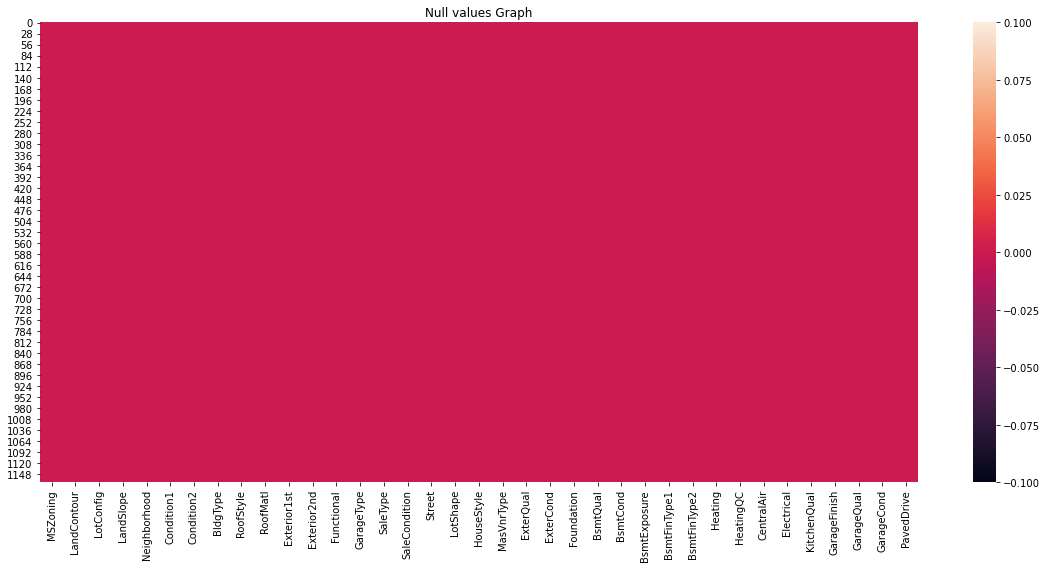

In [75]:
## let's plot our second data and verify for NAN values 



plt.figure(figsize=(16,8))
sns.heatmap(second_num_data.isna())
plt.title("Null values Graph")
plt.tight_layout()

### All is red , this means there is no missing value
### ------------

#### From __second_num_data.describe()__ we see that the second_num_data have numerical data now and we can see some some statistic description

###
### __Let's check the data distribution among all the colums of the both subdataset__
##
## __num_data__ and __second_num_data__

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:y

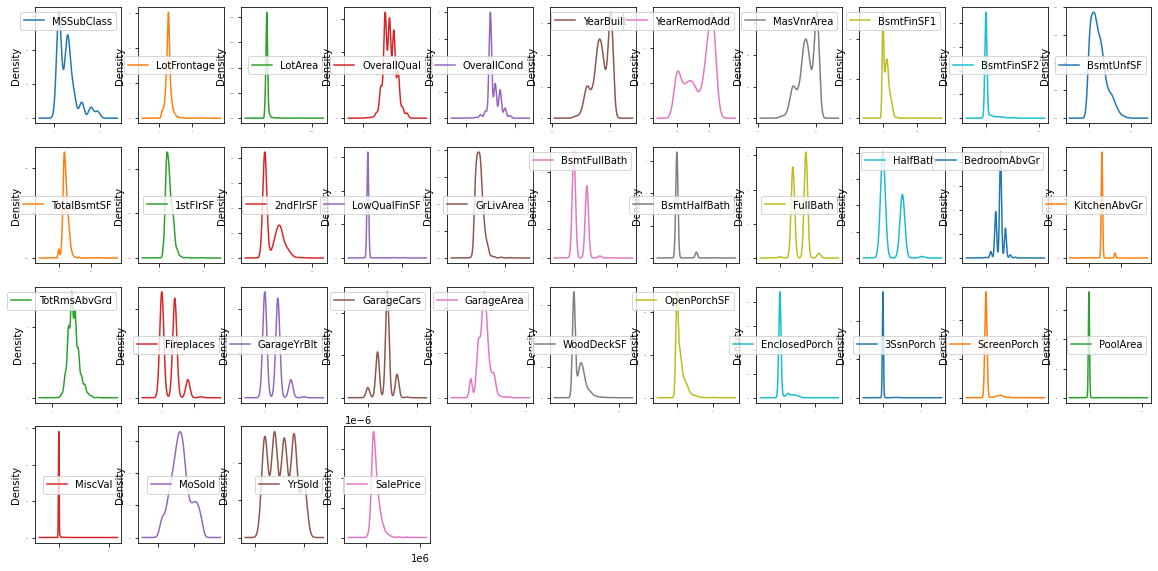

In [76]:
num_data.plot(kind = 'density',subplots = True,layout =(6,11),
              sharex = False,fontsize=1,figsize =(20,15))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:y

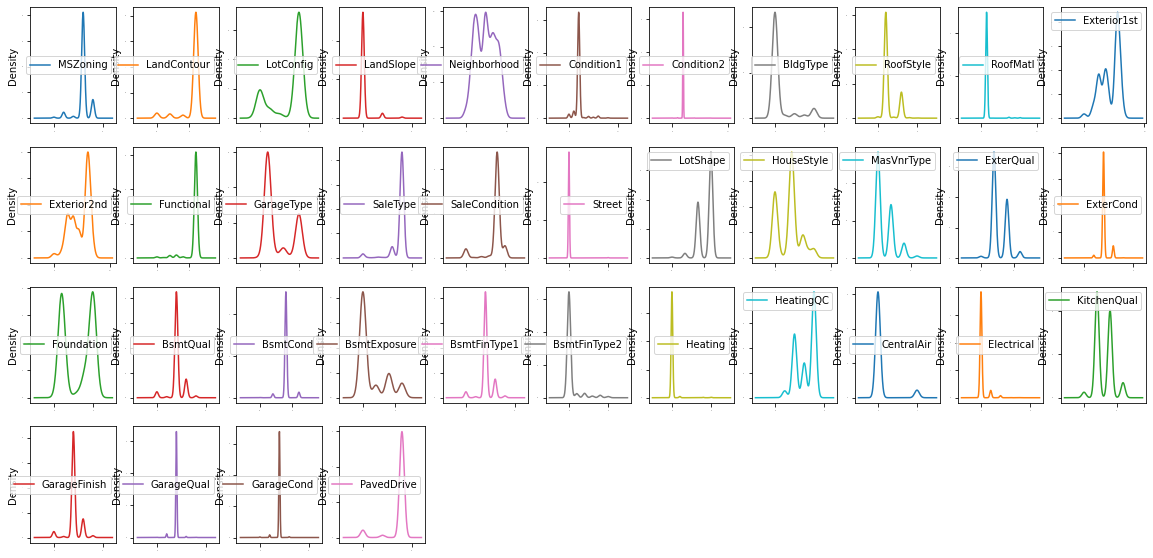

In [77]:
second_num_data.plot(kind = 'density',subplots = True,layout =(6,11),
              sharex = False,fontsize=1,figsize =(20,15))

### The __Density graph__ show that in some columns data is __distributed normally__ and some __Not__...
###

###
### Let's again use __boxplot__ to check if there are  outliers.
###


In [78]:
import warnings
warnings.filterwarnings('ignore')

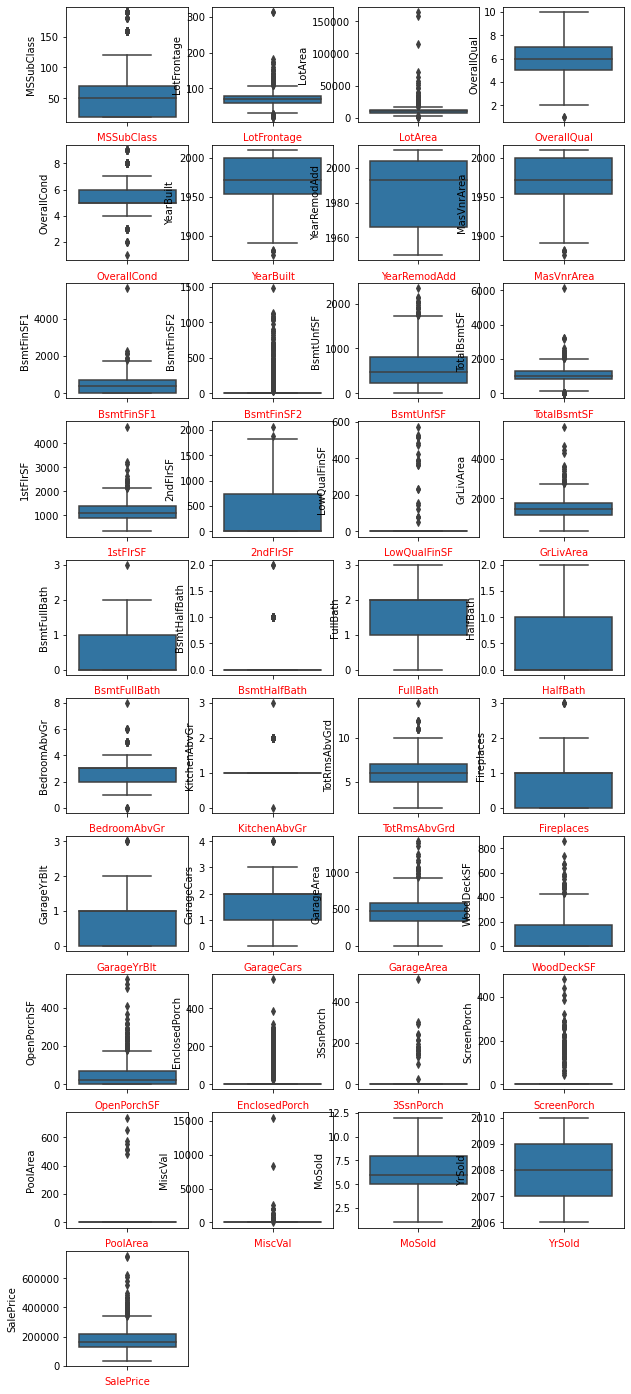

In [79]:
plt.figure(figsize=(10, 25))

graph = 1

for column in num_data:
    if graph <= 37:
        ax = plt.subplot(10,4,graph)
        sns.boxplot(y = num_data[column],orient='h')
        plt.xlabel(column,color ='r',fontsize = 10)
    graph+=1
plt.show()

####
####

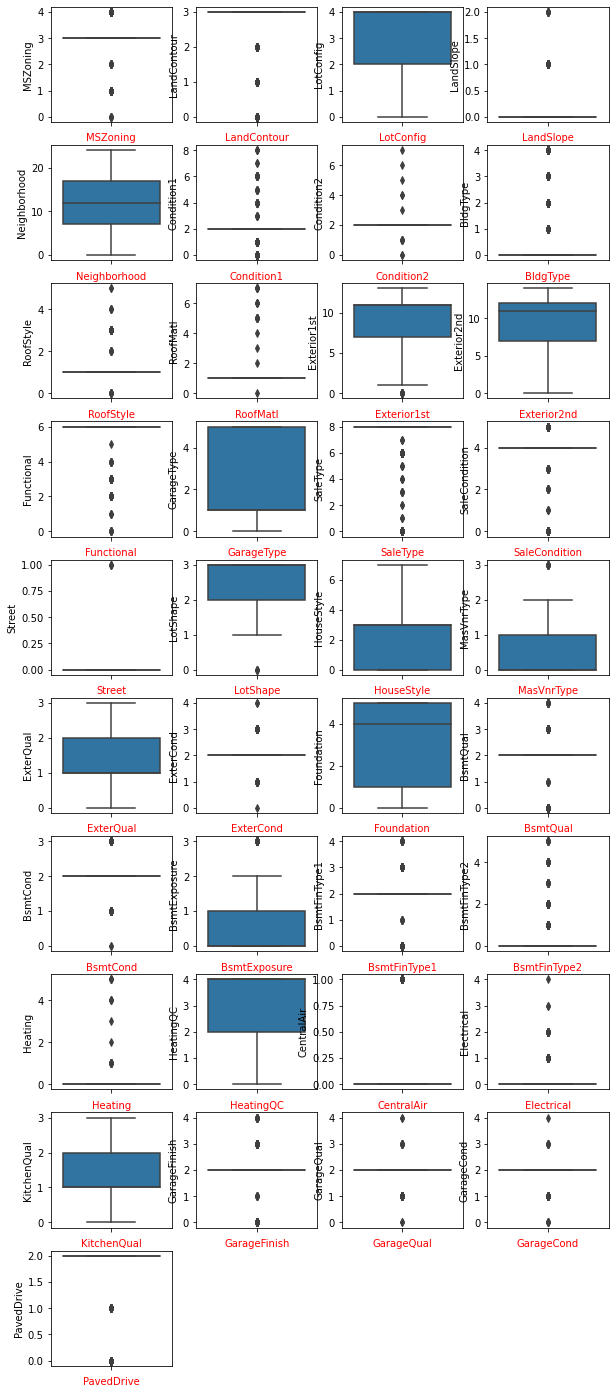

In [80]:
plt.figure(figsize=(10, 25))

graph = 1

for column in second_num_data:
    if graph <= 37:
        ax = plt.subplot(10,4,graph)
        sns.boxplot(y = second_num_data[column],orient='h')
        plt.xlabel(column,color ='r',fontsize = 10)
    graph+=1
plt.show()

##
### Let's Visualize the data distribution again. using distplot and analyse the skewness or Outliers.
##

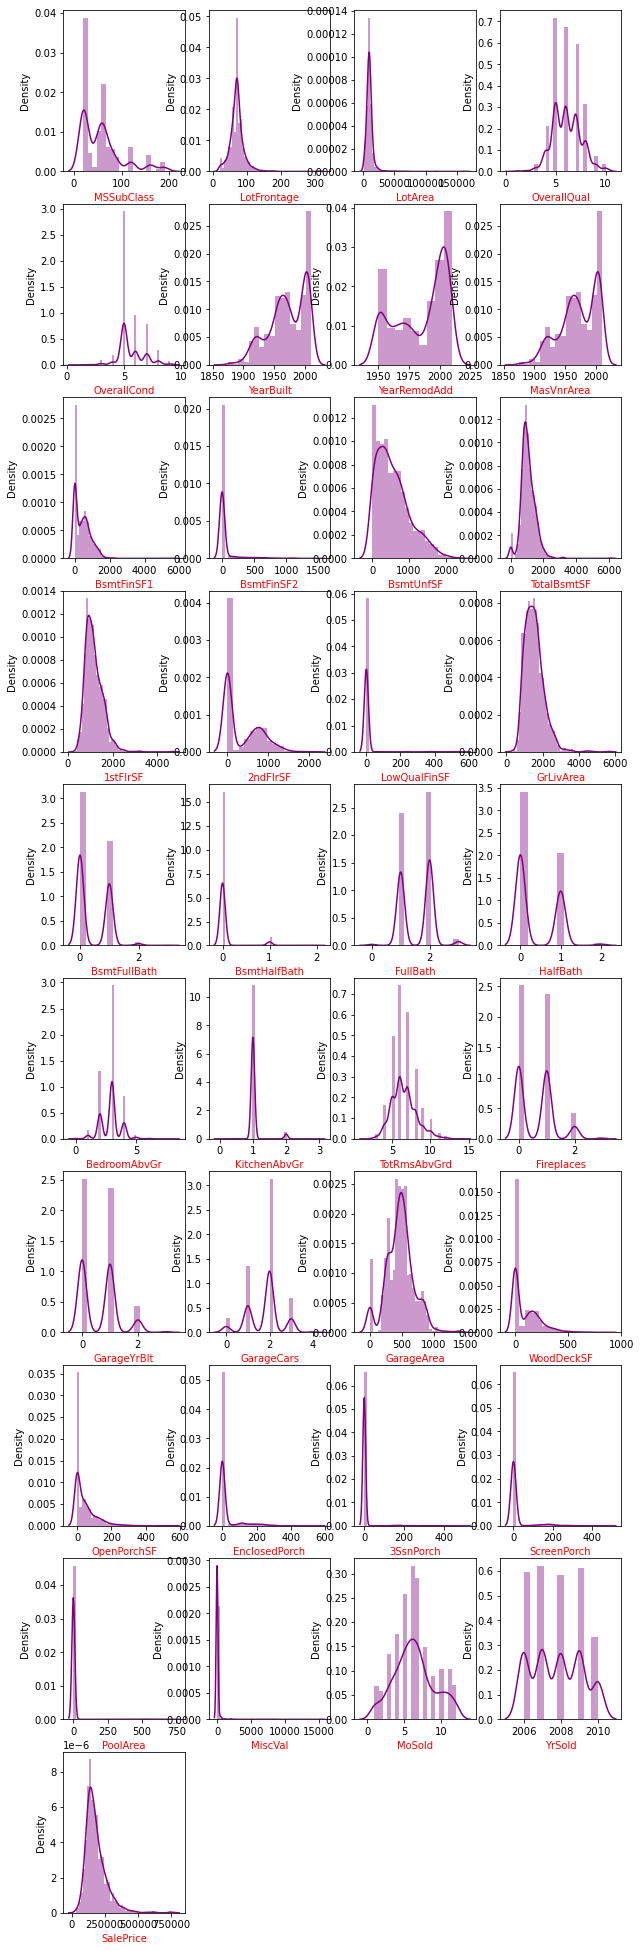

In [86]:
plt.figure(figsize=(10, 35))

graph = 1

for column in num_data:
    if graph <= 37:
        ax = plt.subplot(10,4,graph)
        sns.distplot(num_data[column],color='purple')
        plt.xlabel(column,color ='r',fontsize = 10)
    graph+=1
plt.show()

###
###
###

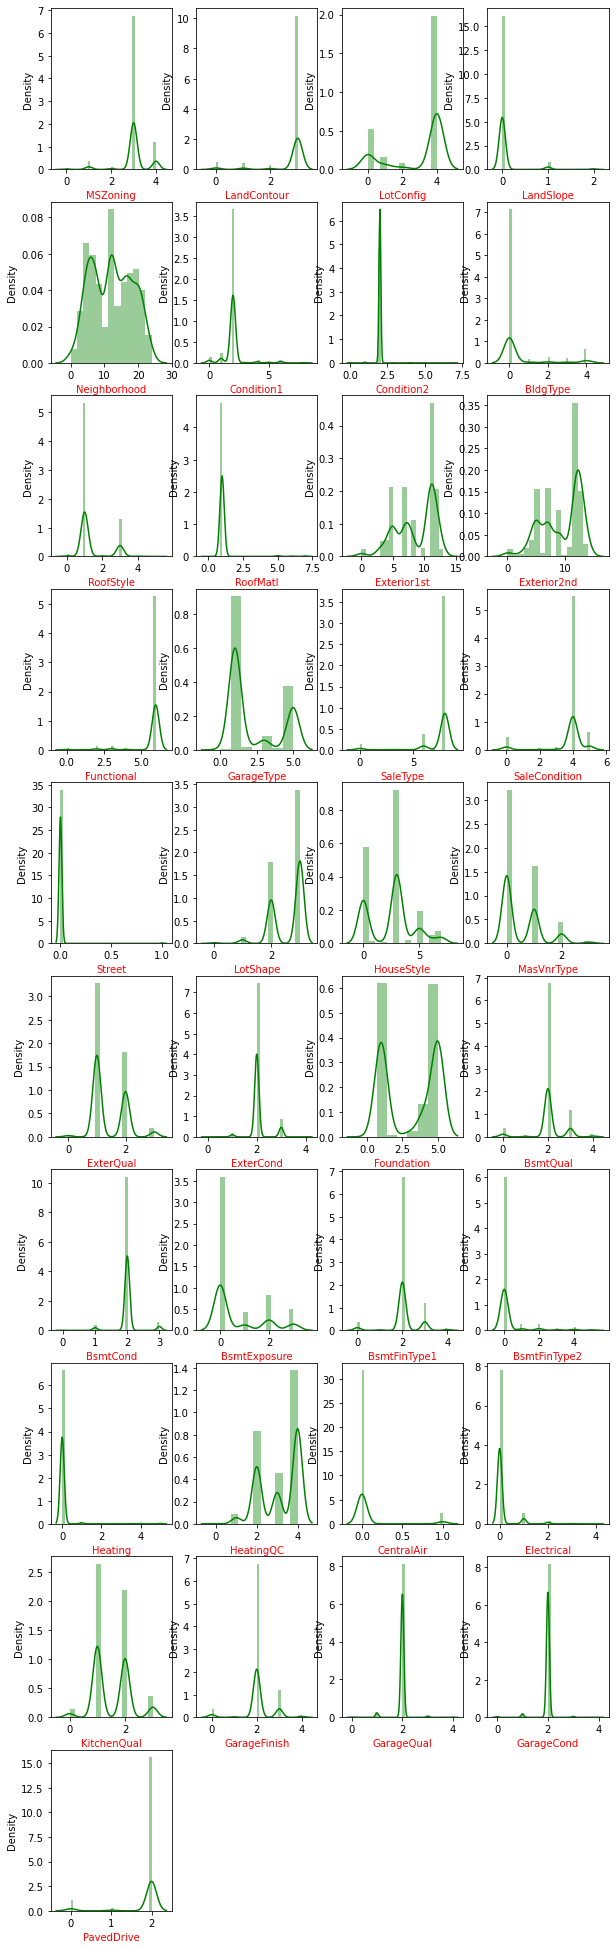

In [85]:
plt.figure(figsize=(10, 35))

graph = 1

for column in second_num_data:
    if graph <= 37:
        ax = plt.subplot(10,4,graph)
        sns.distplot(second_num_data[column],color='green')
        plt.xlabel(column,color ='r',fontsize = 10)
    graph+=1
plt.show()

### We can see that our both subdataset have some __Outliers__ , some __outliers__ are __above the maximum__ and some are __below the minimum__
###
###

## __Let's concatinate the both subdataset into one  __second_num_data__ and __num_data__ like  train.csv__

In [87]:
new_data = pd.concat([second_num_data,num_data],axis=1)

### axis = 1 , mean the concatination should make on clumns-wise

In [89]:
new_data.shape


(1168, 74)

In [90]:
new_data.head()

,MSZoning,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Functional,GarageType,SaleType,SaleCondition,Street,LotShape,HouseStyle,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,3,4,0,13,2,2,4,1,1,8,9,6,1,8,4,0.0,2.0,3.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,120,70.98847,4928,6,5,1976,1976,1976.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,1.0,2,440,0,205,0,0,0,0,0,2,2007,128000
1,3,3,4,1,12,2,2,0,0,5,12,13,6,1,8,4,0.0,2.0,3.0,0.0,2.0,3.0,5.0,2.0,3.0,3.0,2.0,2.0,0.0,4.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,20,95.00000,15865,8,6,1970,1970,1970.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,1.0,2,621,81,207,0,0,224,0,0,10,2007,268000
2,3,3,1,0,15,2,2,0,1,1,7,7,6,1,8,4,0.0,2.0,0.0,0.0,2.0,2.0,5.0,2.0,2.0,2.0,2.0,0.0,0.0,4.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,60,92.00000,9920,7,5,1996,1997,1996.0,862,0,255,1117,1127,886,0,2013,1,0,2,1,3,1,8,1,1.0,2,455,180,130,0,0,0,0,0,6,2007,269790
3,3,3,4,0,14,2,2,0,3,1,8,9,6,1,0,4,0.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,20,105.00000,11751,6,6,1977,1977,1977.0,705,0,1139,1844,1844,0,0,1844,0,0,2,0,3,1,7,1,1.0,2,546,0,122,0,0,0,0,0,1,2010,190000
4,3,3,2,0,14,2,2,0,1,1,4,4,6,1,8,4,0.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,20,70.98847,16635,6,7,1977,2000,1977.0,1246,0,356,1602,1602,0,0,1602,0,1,2,0,3,1,8,1,1.0,2,529,240,0,0,0,0,0,0,6,2009,215000


#### We can see that the new_data which only numerical values has __74 columns__....
####
####

## We should build a model to predict the __House Sale Price__ which is our label in this problem.
## The Label __SalePrice__ have continous data so it  means it is a __Regression problem__....

###
### We have more than one feature ,so it is __Multiple Linear Regression problem__ 
###

### Let's import some libraries and build Linear regression model.

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import pickle

In [92]:
new_data.head()

,MSZoning,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Functional,GarageType,SaleType,SaleCondition,Street,LotShape,HouseStyle,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,3,4,0,13,2,2,4,1,1,8,9,6,1,8,4,0.0,2.0,3.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,120,70.98847,4928,6,5,1976,1976,1976.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,1.0,2,440,0,205,0,0,0,0,0,2,2007,128000
1,3,3,4,1,12,2,2,0,0,5,12,13,6,1,8,4,0.0,2.0,3.0,0.0,2.0,3.0,5.0,2.0,3.0,3.0,2.0,2.0,0.0,4.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,20,95.00000,15865,8,6,1970,1970,1970.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,1.0,2,621,81,207,0,0,224,0,0,10,2007,268000
2,3,3,1,0,15,2,2,0,1,1,7,7,6,1,8,4,0.0,2.0,0.0,0.0,2.0,2.0,5.0,2.0,2.0,2.0,2.0,0.0,0.0,4.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,60,92.00000,9920,7,5,1996,1997,1996.0,862,0,255,1117,1127,886,0,2013,1,0,2,1,3,1,8,1,1.0,2,455,180,130,0,0,0,0,0,6,2007,269790
3,3,3,4,0,14,2,2,0,3,1,8,9,6,1,0,4,0.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,20,105.00000,11751,6,6,1977,1977,1977.0,705,0,1139,1844,1844,0,0,1844,0,0,2,0,3,1,7,1,1.0,2,546,0,122,0,0,0,0,0,1,2010,190000
4,3,3,2,0,14,2,2,0,1,1,4,4,6,1,8,4,0.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,20,70.98847,16635,6,7,1977,2000,1977.0,1246,0,356,1602,1602,0,0,1602,0,1,2,0,3,1,8,1,1.0,2,529,240,0,0,0,0,0,0,6,2009,215000


In [93]:
new_data.shape

(1168, 74)

In [94]:
# new_data.to_csv('train_cleaned.csv')



###
## Divide the Dataset into __features__ and __label__

In [95]:
## features are given by :

X = new_data.drop('SalePrice',axis=1)

In [96]:
## The label is given by:

y = new_data.SalePrice

###
### __Let's see the relationship between the features and label variable by using Scatterplot()__

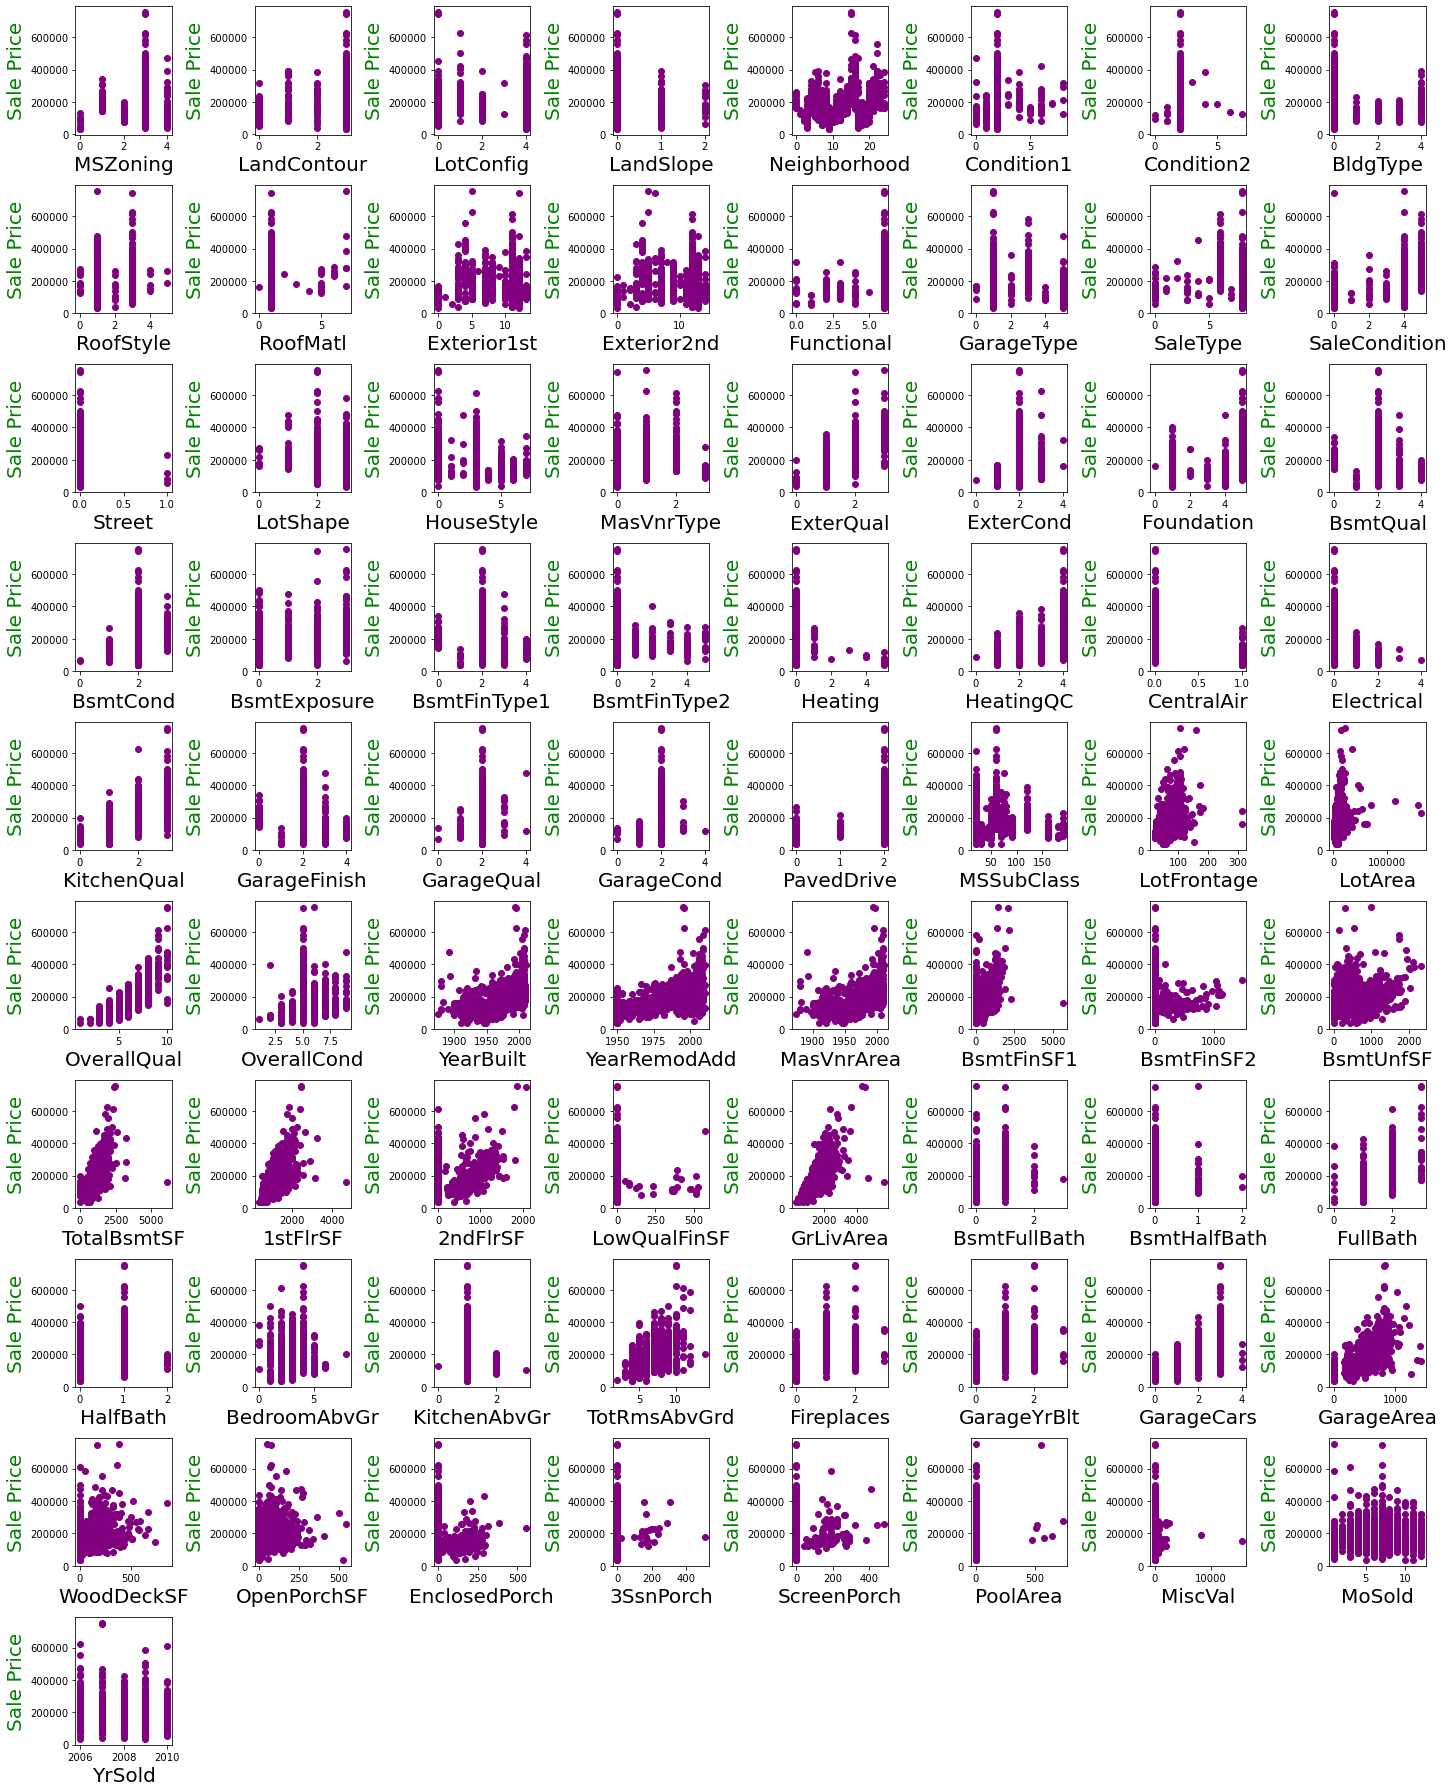

In [97]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber <= 74:
        ax = plt.subplot(10,8, plotnumber)
        plt.scatter(X[column],y, color ='purple')
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Sale Price', fontsize = 20,color='green' )
        
    plotnumber+=1
plt.tight_layout()

####
#### Great the relationship between the label and the features look fairly clear __Linear__
### from the above scatter graph.
###
#### Thus our linearity __assumption__ is satisfied...
####

####
#### Let's build the Model...

###
### let's convert all the features columns to the same scale

In [98]:
## Standarization

scaler = StandardScaler()

X_scaler = scaler.fit_transform(X)

In [99]:
## let's how the that look like
X_scaler

array([[-0.02164599,  0.31847289,  0.60641989, ..., -0.0871313 ,
        -1.61782184, -0.60548713],
       [-0.02164599,  0.31847289,  0.60641989, ..., -0.0871313 ,
         1.3614701 , -0.60548713],
       [-0.02164599,  0.31847289, -1.22066119, ..., -0.0871313 ,
        -0.12817587, -0.60548713],
       ...,
       [-0.02164599,  0.31847289, -0.61163416, ..., -0.0871313 ,
         0.24423562,  0.8992128 ],
       [-4.76211672,  0.31847289,  0.60641989, ..., -0.0871313 ,
         0.24423562,  0.14686284],
       [-0.02164599,  0.31847289,  0.60641989, ..., -0.0871313 ,
        -0.12817587, -1.3578371 ]])

###
### Let's go ahead and build  the model using __linear regression__ and see how good fits our data. But first let's split our data in train and test.

In [100]:
from sklearn.metrics import mean_absolute_error

In [746]:
## split data into train and test

In [101]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=165)

####
#### Model Instantiating and training

In [102]:
reg = LinearRegression()
reg.fit(x_train, y_train)

### fit(Questions, Answers)

LinearRegression()

In [103]:
### train score 

reg.score(x_train, y_train)

0.8119720762726287

In [104]:
## test encore

reg.score(x_test,y_test)

0.8089076444411869

In [106]:
y_pred = reg.predict(x_test)

Text(0.5, 1.0, 'Actual VS Predicted')

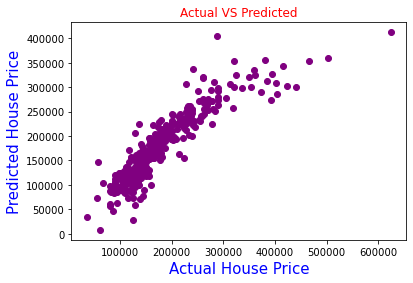

In [107]:
plt.scatter(y_test, y_pred,color ='purple')
plt.xlabel('Actual House Price',color='blue',fontsize =15)
plt.ylabel('Predicted House Price',color='blue',fontsize =15)
plt.title('Actual VS Predicted',color='r')

### Let's use Lasso(L1 form) and Ridge(L2 form) and find the learning rate¶
###

In [108]:
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV


In [109]:
# LassoCV will return best alpha after max iteration
# Normalize  is subtracting the mean and dividibg by the L2-norm


lassocv = LassoCV(alphas=None, max_iter=2000, normalize=True)
lassocv.fit(x_train, y_train)

# CV mean cross validation

## above code is used to get alpha values , the learning rate



LassoCV(max_iter=2000, normalize=True)

In [110]:
alpha_0 = lassocv.alpha_

In [111]:
alpha_0

164.79101854558795

In [112]:
## now that we have the best parameter, let's use Lasso regression
## and see how well our data fitted  before 

lasso_reg = Lasso(alpha=alpha_0)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=164.79101854558795)

In [113]:
## train score 

lasso_reg.score(x_train,y_train)

0.8104228026643143

In [114]:
## test score

lasso_reg.score(x_test,y_test)

0.8211439441188443

### here we can see our test score is increased to 2%
### ---------

###
### Let's check again Using __Ridge__ regression model


#### RidgeCV will return best alpha and coefficients after perfoming n across validations.


In [115]:
#### 10 across validations.

ridgecv = RidgeCV(alphas= np.arange(0.01,1,0.1), normalize=True)


In [116]:
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91]),
        normalize=True)

In [117]:
alpha1 = ridgecv.alpha_
alpha1

0.7100000000000001

### The result is alpha = 0.71, It is called learning rate.


In [118]:
ridge_model = Ridge(alpha=alpha1)


In [119]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.7100000000000001)

In [120]:
### train encore 

ridge_model.score(x_train,y_train)

0.8119446751894307

###

In [121]:
## test encore 

ridge_model.score(x_test,y_test)

0.8106260773213165


### Concluson: from all the above verifications we can say that our model is not overfiting and __ridge gives good score__.
###
###
###

# Again let's build a secnod model using: __AdaBoostRegressor Algorithum__

In [122]:
## importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score

In [123]:
## import the train cleaned data
data_ = pd.read_csv('train_cleaned.csv')

In [124]:
data_.head()

,Unnamed: 0,MSZoning,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Functional,GarageType,SaleType,SaleCondition,Street,LotShape,HouseStyle,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,3,3,4,0,13,2,2,4,1,1,8,9,6,1,8,4,0.0,2.0,3.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,120,70.98847,4928,6,5,1976,1976,1976.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,1.0,2,440,0,205,0,0,0,0,0,2,2007,128000
1,1,3,3,4,1,12,2,2,0,0,5,12,13,6,1,8,4,0.0,2.0,3.0,0.0,2.0,3.0,5.0,2.0,3.0,3.0,2.0,2.0,0.0,4.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,20,95.00000,15865,8,6,1970,1970,1970.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,1.0,2,621,81,207,0,0,224,0,0,10,2007,268000
2,2,3,3,1,0,15,2,2,0,1,1,7,7,6,1,8,4,0.0,2.0,0.0,0.0,2.0,2.0,5.0,2.0,2.0,2.0,2.0,0.0,0.0,4.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,60,92.00000,9920,7,5,1996,1997,1996.0,862,0,255,1117,1127,886,0,2013,1,0,2,1,3,1,8,1,1.0,2,455,180,130,0,0,0,0,0,6,2007,269790
3,3,3,3,4,0,14,2,2,0,3,1,8,9,6,1,0,4,0.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,20,105.00000,11751,6,6,1977,1977,1977.0,705,0,1139,1844,1844,0,0,1844,0,0,2,0,3,1,7,1,1.0,2,546,0,122,0,0,0,0,0,1,2010,190000
4,4,3,3,2,0,14,2,2,0,1,1,4,4,6,1,8,4,0.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,20,70.98847,16635,6,7,1977,2000,1977.0,1246,0,356,1602,1602,0,0,1602,0,1,2,0,3,1,8,1,1.0,2,529,240,0,0,0,0,0,0,6,2009,215000


In [125]:
## let's drop the Unnamed: 0 column
data_.drop('Unnamed: 0',axis=1,inplace=True)

In [126]:
data_.head()

,MSZoning,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Functional,GarageType,SaleType,SaleCondition,Street,LotShape,HouseStyle,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,3,4,0,13,2,2,4,1,1,8,9,6,1,8,4,0.0,2.0,3.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,120,70.98847,4928,6,5,1976,1976,1976.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,1.0,2,440,0,205,0,0,0,0,0,2,2007,128000
1,3,3,4,1,12,2,2,0,0,5,12,13,6,1,8,4,0.0,2.0,3.0,0.0,2.0,3.0,5.0,2.0,3.0,3.0,2.0,2.0,0.0,4.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,20,95.00000,15865,8,6,1970,1970,1970.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,1.0,2,621,81,207,0,0,224,0,0,10,2007,268000
2,3,3,1,0,15,2,2,0,1,1,7,7,6,1,8,4,0.0,2.0,0.0,0.0,2.0,2.0,5.0,2.0,2.0,2.0,2.0,0.0,0.0,4.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,60,92.00000,9920,7,5,1996,1997,1996.0,862,0,255,1117,1127,886,0,2013,1,0,2,1,3,1,8,1,1.0,2,455,180,130,0,0,0,0,0,6,2007,269790
3,3,3,4,0,14,2,2,0,3,1,8,9,6,1,0,4,0.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,20,105.00000,11751,6,6,1977,1977,1977.0,705,0,1139,1844,1844,0,0,1844,0,0,2,0,3,1,7,1,1.0,2,546,0,122,0,0,0,0,0,1,2010,190000
4,3,3,2,0,14,2,2,0,1,1,4,4,6,1,8,4,0.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,20,70.98847,16635,6,7,1977,2000,1977.0,1246,0,356,1602,1602,0,0,1602,0,1,2,0,3,1,8,1,1.0,2,529,240,0,0,0,0,0,0,6,2009,215000


In [1099]:
data_.shape

(1168, 74)

In [127]:
## let's expliting the data_
X_ = data_.drop('SalePrice',axis=1)

In [128]:
y_ = data_.SalePrice

##
## __AdaBoost model training__

In [129]:
from sklearn.model_selection import train_test_split


In [130]:
ada = AdaBoostRegressor()

In [131]:
x_train,x_test,y_train,y_test = train_test_split(X_,y_,test_size=0.30, random_state=165)

In [132]:
ada.fit(x_train,y_train)


AdaBoostRegressor()

In [133]:
## Model prediction on the trained data

y_pred_= ada.predict(x_train)

In [134]:
### train encore 

print('R square score',metrics.r2_score(y_train,y_pred_))

R square score 0.8637600299420072


In [135]:


y_pred1 = ada.predict(x_test)
print('R square score',metrics.r2_score(y_test,y_pred))


R square score 0.8089076444411869


In [136]:
## test encore 

ada.score(x_test,y_test)

0.8075061144123331

###
### Let's plot the result and see...

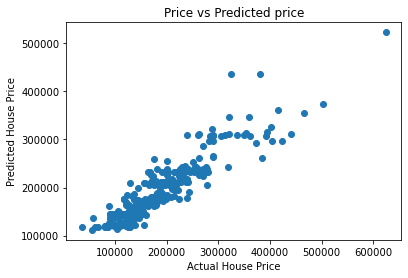

In [137]:
plt.scatter(y_test,y_pred1)
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Price vs Predicted price')
plt.show()

## Let'st go for __Hyperparametric turning__ and see if we can improve the score of the model
##

In [138]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [139]:

dt = DecisionTreeRegressor(max_depth=5)

In [140]:
params = {'n_estimators':[40,47,49,50,52,55,60,62],'learning_rate':[0.30,0.35,0.40,0.45,0.55,0.57]}

In [141]:
rnd_search = RandomizedSearchCV(AdaBoostRegressor(),cv=8,param_distributions = params)

In [142]:
rnd_search.fit(x_train,y_train)

RandomizedSearchCV(cv=8, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.35, 0.4, 0.45,
                                                          0.55, 0.57],
                                        'n_estimators': [40, 47, 49, 50, 52, 55,
                                                         60, 62]})

In [144]:
## let's check the best estimators

rnd_search.best_estimator_

AdaBoostRegressor(learning_rate=0.45, n_estimators=62)

In [145]:
## let's build again the model using the known estimators

ada_ = AdaBoostRegressor(base_estimator=dt,learning_rate=0.45,n_estimators=62)

In [146]:
ada_.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                  learning_rate=0.45, n_estimators=62)

In [147]:
### let's predict the x_train

y_pred_1 = ada_.predict(x_train)

In [148]:
print('\n*****Accuracy post turning****\n')
print(metrics.r2_score(y_train,y_pred_1))


*****Accuracy post turning****

0.9524584843082771


In [149]:
## train encore 

ada_.score(x_train,y_train)

0.9524584843082771

In [150]:
## test encore 

ada_.score(x_test,y_test)

0.8650326310417733

In [151]:
y_test_pred = ada_.predict(x_test)

In [152]:

print('\n*****Accuracy post turning****\n')

print(metrics.r2_score(y_test,y_test_pred))


*****Accuracy post turning****

0.8650326310417733


###
###

### ---------------------------------------------

###
###

##
### saving the model

In [285]:

import joblib

In [1130]:
joblib.dump(ada_,"housing_model.pkl")

['housing_model.pkl']

##
### loading the saved  model.

In [1133]:
model = joblib.load('housing_model.pkl')

In [1134]:
## let's load the test data

test = pd.read_csv('test_clearned.csv')

In [1135]:
## let's do a prediction of the test data

prediction = model.predict(test)

In [1136]:
prediction = pd.DataFrame(prediction) ## converting into Data Frame

In [1137]:
prediction.to_csv('prediction.csv',index=False) # Saving the prediction into .csv file

## Let's build the __third model__ see if we can get better by using __PCA__ (Principal Component Analytics)

#### Since we have more feature there chance that our model can be overfitting
#### since PCA is Dementional Reduction Analysis it can help to avoid overfitting model.

In [156]:
new_data

,MSZoning,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Functional,GarageType,SaleType,SaleCondition,Street,LotShape,HouseStyle,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,3,4,0,13,2,2,4,1,1,8,9,6,1,8,4,0.0,2.0,3.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,120,70.98847,4928,6,5,1976,1976,1976.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,1.0,2,440,0,205,0,0,0,0,0,2,2007,128000
1,3,3,4,1,12,2,2,0,0,5,12,13,6,1,8,4,0.0,2.0,3.0,0.0,2.0,3.0,5.0,2.0,3.0,3.0,2.0,2.0,0.0,4.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,20,95.00000,15865,8,6,1970,1970,1970.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,1.0,2,621,81,207,0,0,224,0,0,10,2007,268000
2,3,3,1,0,15,2,2,0,1,1,7,7,6,1,8,4,0.0,2.0,0.0,0.0,2.0,2.0,5.0,2.0,2.0,2.0,2.0,0.0,0.0,4.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,60,92.00000,9920,7,5,1996,1997,1996.0,862,0,255,1117,1127,886,0,2013,1,0,2,1,3,1,8,1,1.0,2,455,180,130,0,0,0,0,0,6,2007,269790
3,3,3,4,0,14,2,2,0,3,1,8,9,6,1,0,4,0.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,20,105.00000,11751,6,6,1977,1977,1977.0,705,0,1139,1844,1844,0,0,1844,0,0,2,0,3,1,7,1,1.0,2,546,0,122,0,0,0,0,0,1,2010,190000
4,3,3,2,0,14,2,2,0,1,1,4,4,6,1,8,4,0.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,20,70.98847,16635,6,7,1977,2000,1977.0,1246,0,356,1602,1602,0,0,1602,0,1,2,0,3,1,8,1,1.0,2,529,240,0,0,0,0,0,0,6,2009,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,3,3,4,0,19,2,2,0,1,1,7,7,6,5,8,4,0.0,2.0,3.0,1.0,1.0,3.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,20,70.98847,9819,5,5,1967,1967,1967.0,450,0,432,882,900,0,0,900,0,0,1,0,3,1,5,0,0.0,1,280,0,0,0,0,0,0,0,2,2010,122000
1164,3,3,4,0,7,1,2,0,1,1,11,12,6,5,8,4,0.0,3.0,3.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,20,67.00000,8777,4,5,1949,2003,1949.0,0,0,0,0,1126,0,0,1126,0,0,2,0,2,1,5,0,0.0,2,520,0,96,0,0,0,0,0,5,2009,108000
1165,3,3,2,0,13,2,2,3,1,1,8,2,6,1,8,4,0.0,3.0,0.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,160,24.00000,2280,6,6,1976,1976,1976.0,566,0,289,855,855,601,0,1456,0,0,2,1,3,1,7,1,1.0,2,440,87,0,0,0,0,0,0,7,2009,148500
1166,0,3,4,0,9,1,2,0,2,1,3,3,6,5,8,4,0.0,3.0,0.0,0.0,1.0,1.0,4.0,1.0,2.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,70,50.00000,8500,4,4,1920,1950,1920.0,0,0,649,649,649,668,0,1317,0,0,1,0,3,1,6,0,0.0,1,250,0,54,172,0,0,0,0,7,2008,40000


In [155]:
new_data.shape

(1168, 74)

In [ ]:
new_data.

In [188]:
X = new_data.drop('SalePrice',axis=1)

In [189]:
Y = new_data.SalePrice

In [187]:
Y

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1168, dtype: int64

In [190]:
## standarization of the feature data 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [191]:
X_scaled

array([[-0.02164599,  0.31847289,  0.60641989, ..., -0.0871313 ,
        -1.61782184, -0.60548713],
       [-0.02164599,  0.31847289,  0.60641989, ..., -0.0871313 ,
         1.3614701 , -0.60548713],
       [-0.02164599,  0.31847289, -1.22066119, ..., -0.0871313 ,
        -0.12817587, -0.60548713],
       ...,
       [-0.02164599,  0.31847289, -0.61163416, ..., -0.0871313 ,
         0.24423562,  0.8992128 ],
       [-4.76211672,  0.31847289,  0.60641989, ..., -0.0871313 ,
         0.24423562,  0.14686284],
       [-0.02164599,  0.31847289,  0.60641989, ..., -0.0871313 ,
        -0.12817587, -1.3578371 ]])

## __Principal Component Analytics ( PCA )__

In [192]:
pca = PCA()
pca.fit_transform(X_scaled)

array([[-7.00790942e-01, -1.74995107e+00, -4.52466718e-01, ...,
         4.64583503e-15,  2.09189267e-16, -2.70444138e-16],
       [ 4.28894934e+00,  2.67016667e+00,  4.12531374e+00, ...,
        -1.38738772e-15,  3.17599847e-16,  2.20179145e-17],
       [ 2.98743480e+00,  7.37740318e-01, -4.65857249e-01, ...,
         3.91651761e-16,  3.32074966e-16, -2.48467459e-17],
       ...,
       [-8.22402368e-01, -8.39723999e-01, -1.64318841e+00, ...,
         9.80873660e-17,  2.14273159e-16, -9.10111524e-18],
       [-4.31984947e+00, -1.54412355e+00, -4.32865954e+00, ...,
        -2.02736633e-16,  9.75328043e-17, -9.54499238e-18],
       [ 2.12323788e+00, -3.70790006e-01, -1.65662916e+00, ...,
         1.27791580e-17,  4.35023306e-17, -4.43724506e-17]])

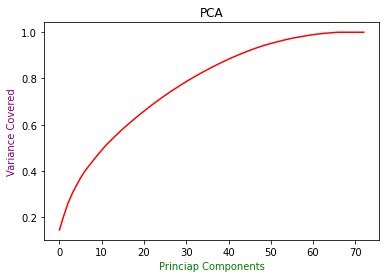

In [193]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_),color ='red')
plt.xlabel("Princiap Components",color ='green')
plt.ylabel("Variance Covered",color ='purple')
plt.title('PCA')
plt.show()

### from the above graph we can see that only 50 feature are able to give __90% variance__
###  ---------

In [252]:
PCAs = []
i =0
while i <55:
    PCAs.append('PCA1')
    i+=1

In [253]:
print(PCAs)

['PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1', 'PCA1']


In [254]:
len(PCAs)

55

In [255]:

## instantiate again PCA and give the no of components selected

pca = PCA(n_components=55)
new_pcomp = pca.fit_transform(X_scaled)
princi_comp = pd.DataFrame(new_pcomp,
                          columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8',
                                   'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16',
                                   'PCA17', 'PCA18', 'PCA19', 'PCA20', 'PCA21', 'PCA22', 'PCA23', 'PCA24', 
                                   'PCA25', 'PCA26', 'PCA27', 'PCA28', 'PCA29', 'PCA30', 'PCA31', 'PCA32',
                                   'PCA33', 'PCA34', 'PCA35', 'PCA36', 'PCA37', 'PCA38', 'PCA39', 'PCA40', 
                                   'PCA41', 'PCA42', 'PCA43', 'PCA44', 'PCA45', 'PCA46', 'PCA47', 'PCA48',
                                   'PCA49', 'PCA50','PCA51','PCA52','PCA53','PCA54','PCA55'])
princi_comp



,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30,PCA31,PCA32,PCA33,PCA34,PCA35,PCA36,PCA37,PCA38,PCA39,PCA40,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50,PCA51,PCA52,PCA53,PCA54,PCA55
0,-0.700791,-1.749951,-0.452466,-0.628496,-0.279694,1.442176,-0.067517,-0.739543,1.381112,0.241354,-0.476273,1.615413,-0.150964,1.068512,0.764362,0.024193,0.963858,0.469846,-0.071960,1.362429,0.005292,-0.674828,0.186775,-0.031358,0.222643,0.639931,1.475986,-0.853407,-1.903326,0.814938,-0.056877,0.624519,0.772796,0.450209,0.554822,0.412748,-0.880616,-0.297479,0.484588,-0.316466,0.699926,0.391883,-1.209343,-0.650011,-2.124739,-0.575665,-0.048740,0.337012,0.025598,0.031669,-0.561662,-1.085911,-0.127882,-0.376906,0.221537
1,4.288949,2.670167,4.125314,1.228249,-0.783424,-2.069837,1.175597,4.143608,2.889376,-0.204354,2.362901,2.351166,-2.917721,1.672097,0.954729,0.492564,-1.900714,0.514336,-4.464091,2.009985,-0.007363,2.132437,-1.803916,0.854166,-0.301290,-0.523377,1.092685,2.133549,-0.245445,-0.154991,-0.994991,-2.295154,-0.233059,-0.240804,-0.066577,1.011573,-1.170323,0.843400,-0.122250,-0.775662,0.555721,-0.666938,0.703476,0.302282,0.149520,0.286878,0.058524,0.406085,-1.028682,-0.196285,0.472857,-1.264372,-0.392253,-0.199945,-0.086111
2,2.987435,0.737740,-0.465857,0.435309,-1.309179,0.545372,0.910123,-0.777307,-1.104317,0.358539,-0.029712,-1.598234,-0.748903,0.249153,0.585341,0.426684,0.231105,0.744649,-0.308383,0.410249,0.276260,-0.867690,-0.440303,-0.892708,0.122995,0.737720,-0.058496,0.387417,-0.164184,-0.029555,0.305723,0.554683,-0.326921,0.794028,-0.184202,-0.054104,-0.607970,-0.019485,-0.711148,0.158414,0.206020,0.078489,0.334246,0.350628,-0.411888,0.199330,0.118599,0.281774,-0.763703,-0.178087,0.486562,0.214969,-0.576984,0.143795,0.068437
3,1.644339,0.665531,1.529743,0.835388,2.606934,0.079526,-2.665526,-0.642656,0.617157,0.248707,-0.966652,0.044233,0.373773,-0.514745,0.354657,-0.487623,0.377250,-0.513018,1.642674,0.828833,0.783566,2.592415,-0.849316,0.172514,-1.064304,-0.413417,0.266555,-0.278513,-1.227488,1.140401,0.054902,2.718367,0.448516,-0.393249,-0.038126,1.035419,-0.194094,-0.548216,0.221626,-0.796442,0.565012,-0.044219,0.453306,0.486434,-1.430586,-0.685235,0.466883,0.714646,-1.049967,-1.373749,-0.068642,-0.322544,-0.089353,-0.194799,0.326889
4,1.863795,0.375105,2.389932,0.625211,-0.223536,0.696080,-1.780847,-1.114467,0.113484,0.037638,1.315858,-0.071804,-0.220100,-0.448609,0.243178,1.923550,0.691478,-1.156406,0.798484,-2.723383,-0.404750,-0.000571,0.149805,-0.308914,0.070873,0.662363,-1.587570,-1.714539,-0.971848,0.840377,1.064940,-0.015022,-0.390213,-0.531149,0.321673,0.441688,0.851136,-0.626594,0.773855,-0.677755,-0.541643,-1.573724,-0.508808,-0.680904,0.865138,0.155978,0.628410,-0.138404,-0.137124,0.183747,0.012540,-0.094199,0.347671,-0.416003,-0.396369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-2.901858,-1.745072,0.588828,0.641545,-0.161257,-0.881976,-1.629646,-0.543587,-0.473451,-0.714035,0.205570,-0.761522,0.810434,0.355100,0.705231,-0.252181,1.102151,-0.457471,-0.489092,0.077841,-0.177874,0.676627,-0.234528,0.518208,-0.617141,0.237922,0.120941,-1.275164,-0.934187,0.436038,0.676676,-0.466726,0.081331,-0.609215,0.523021,0.969437,0.244011,1.017261,0.742333,-0.544760,2.172499,0.379744,0.564858,0.899886,0.356233,0.460704,-0.129019,0.292656,-0.518777,1.266199,-0.073245,-0.061500,0.292859,-0.132024,0.071143
1164,-2.548350,-1.308317,-1.325829,-0.454062,0.726567,-1.809605,0.812059,0.811023,-0.705312,-0.951730,-0.435755,0.346539,0.841409,0.006873,0.087882,0.133347,-0.003463,-0.194650,-0.222073,-0.454099,-0.035860,0.390860,-0.424613,0.205341,0.039286,1.200230,-0.243927,0.268524,0.287464,0.074303,-1.066731,0.183089,0.05

In [256]:
princi_comp.shape

(1168, 55)

In [257]:
### let's spliting the components

x_train,x_test,y_train,y_test = train_test_split(princi_comp,Y,test_size=0.25,random_state=355)

In [258]:
ada = AdaBoostRegressor()

In [259]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [261]:
y_pred = ada.predict(x_train)

In [262]:
print('R square score',metrics.r2_score(y_train,y_pred))

R square score 0.8773626559117634


In [263]:
ada.score(x_test,y_test)

0.8076088523056751

In [264]:
y_predb = ada.predict(x_test)

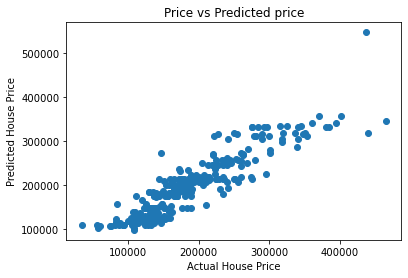

In [265]:
## let's visualyze it 


plt.scatter(y_test,y_predb)
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Price vs Predicted price')
plt.show()

## Let'st go for __Hyperparametric turning__ and see if we can improve the score of the model
##

In [266]:
dt = DecisionTreeRegressor(max_depth=5)

In [267]:
params = {'n_estimators':[40,43,45,49,53,55,57,60,61],
         'learning_rate':[0.20,0.25,0.30,0.33,0.40,0.47,50,0.55]}

In [268]:
Rnd_Srch = RandomizedSearchCV(AdaBoostRegressor(),cv=5, param_distributions=params)

In [269]:
Rnd_Srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.2, 0.25, 0.3, 0.33,
                                                          0.4, 0.47, 50, 0.55],
                                        'n_estimators': [40, 43, 45, 49, 53, 55,
                                                         57, 60, 61]})

In [270]:
Rnd_Srch.best_params_

{'n_estimators': 55, 'learning_rate': 0.25}

In [271]:
ada_2 = AdaBoostRegressor(base_estimator=dt,learning_rate=0.25,n_estimators=55)



In [272]:
ada_2.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                  learning_rate=0.25, n_estimators=55)

In [273]:
## let's check train accuracy

yy_pred = ada_2.predict(x_train)

In [274]:
print('\n*****Accuracy post turning of train data ****\n')

print(metrics.r2_score(y_train,yy_pred))


*****Accuracy post turning of train data ****

0.9495503931141046


In [275]:
yt_pred = ada_2.predict(x_test)

In [282]:
## train data  encore 

ada_2.score(x_train,y_train)

0.9495503931141046

In [283]:
## test data  encore 

ada_2.score(x_test,y_test)

0.8530350444792881

In [281]:
print('\n*****Accuracy post turning of test data ****\n')

print(metrics.r2_score(y_test,yt_pred))


*****Accuracy post turning of test data ****

0.8530350444792881


### __CONCLUSION__: I have build tow model using LinearRegression and Adaboost Regressor after parameter turning I found out that 
### __Adaboost Regressor fit better my dataset white 85% Accuracy.__

##### -------------------
### Let's save the model2

In [286]:
## importing libraries
import joblib

In [287]:
joblib.dump(ada_2,"housing_model2.pkl")

['housing_model2.pkl']

#### _____________________________________

### Loading the saved model2

In [289]:
models = joblib.load('housing_model2.pkl')

In [290]:
## importing the clearned text data 
test1 = pd.read_csv('test_clearned.csv')

## first reduce our test data into components (PCA)

In [292]:
## standarization of the feature data 

scaler = StandardScaler()
X_scaled_test = scaler.fit_transform(test1)

In [293]:
X_scaled_test

array([[-0.28700579, -2.56610055, -2.00110584, ..., -0.12602122,
         0.27695974, -0.65090813],
       [-0.28700579,  0.29929662, -1.35113598, ..., -0.12602122,
         0.63799655,  0.86355541],
       [-0.28700579,  0.29929662,  0.5987736 , ..., -0.12602122,
        -0.08407707,  0.86355541],
       ...,
       [-0.28700579,  0.29929662, -1.35113598, ...,  3.00383753,
        -1.16718749,  1.62078718],
       [ 1.80813647,  0.29929662, -2.00110584, ..., -0.12602122,
         1.36007017, -1.4081399 ],
       [ 1.80813647,  0.29929662,  0.5987736 , ..., -0.12602122,
        -0.08407707, -1.4081399 ]])

In [294]:
pca = PCA()
pca.fit_transform(X_scaled_test)

array([[ 5.84394564e+00,  2.54328285e+00,  1.69759536e+00, ...,
        -5.69113060e-16, -3.02971208e-16,  2.67378150e-17],
       [ 1.11241427e+00, -7.27401747e-01,  2.93899253e+00, ...,
         1.86939881e-16,  1.62965425e-16, -3.08673733e-17],
       [ 3.92038055e+00,  7.34879387e-01, -5.34365397e-01, ...,
        -4.03259471e-17, -6.68394771e-17, -1.62089118e-16],
       ...,
       [-5.85715942e-01, -8.44125524e-01,  1.86754350e+00, ...,
        -4.61523986e-17,  9.02723628e-17,  2.99658634e-17],
       [-2.70607249e+00,  3.23746867e+00, -7.51577680e-01, ...,
        -1.19429786e-17, -2.84403577e-18,  2.34876712e-16],
       [-4.88707790e+00,  2.37624101e-01, -2.41434263e+00, ...,
        -5.79840170e-16, -2.68166670e-16, -3.82351639e-17]])

In [295]:
## instantiate again PCA and give the no of components selected

pca = PCA(n_components=55)
new_pcomp = pca.fit_transform(X_scaled_test)
princi_comp = pd.DataFrame(new_pcomp,
                          columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8',
                                   'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16',
                                   'PCA17', 'PCA18', 'PCA19', 'PCA20', 'PCA21', 'PCA22', 'PCA23', 'PCA24', 
                                   'PCA25', 'PCA26', 'PCA27', 'PCA28', 'PCA29', 'PCA30', 'PCA31', 'PCA32',
                                   'PCA33', 'PCA34', 'PCA35', 'PCA36', 'PCA37', 'PCA38', 'PCA39', 'PCA40', 
                                   'PCA41', 'PCA42', 'PCA43', 'PCA44', 'PCA45', 'PCA46', 'PCA47', 'PCA48',
                                   'PCA49', 'PCA50','PCA51','PCA52','PCA53','PCA54','PCA55'])
princi_comp



,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30,PCA31,PCA32,PCA33,PCA34,PCA35,PCA36,PCA37,PCA38,PCA39,PCA40,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50,PCA51,PCA52,PCA53,PCA54,PCA55
0,5.843946,2.543283,1.697595,-1.504978,1.801592,0.503262,-0.359926,0.105447,-0.552797,0.879387,-0.416112,-0.458532,-0.045172,-0.196769,0.034122,1.755534,-0.660140,0.666197,-0.185839,-0.119904,-0.185715,-0.793555,1.184005,1.031174,0.251965,0.111967,-1.400013,-0.131968,-0.822640,0.375284,-0.452228,-0.587603,0.933074,-0.414324,-0.303970,-0.495915,0.501727,0.607086,-0.299392,-0.406091,-0.500643,-0.121697,-0.440024,0.073624,-0.818439,-0.199075,0.248876,-0.603392,0.374835,-0.544769,-0.121157,0.170531,0.065695,0.399273,-0.541494
1,1.112414,-0.727402,2.938993,-1.543264,-2.970145,1.215738,-4.280014,0.557957,1.506130,2.996606,2.480403,-0.570794,1.131002,1.627965,1.981061,2.227359,-0.104365,0.957651,1.567122,-1.404956,-0.640048,0.180154,0.671256,-1.332536,-0.891297,0.214020,-1.180742,-0.968934,-0.229835,-0.668894,1.310140,0.343587,0.536791,-0.818883,0.112371,0.644214,-1.613618,-1.298413,0.401929,0.217149,0.899087,1.162330,-0.355736,-0.383244,0.784914,-0.684002,0.954064,0.278639,0.268284,0.534128,-0.079544,-0.374622,-0.203401,-0.037406,0.787248
2,3.920381,0.734879,-0.534365,-1.454401,2.898568,0.173740,-0.671577,-1.260041,0.541024,-1.223507,0.447038,-0.273646,0.743487,-0.771058,0.453501,-1.160099,0.244994,-0.274922,-0.024621,0.245726,-0.250305,-0.433419,-1.057247,-0.103604,-0.752666,-0.664964,0.542407,-0.200604,1.026125,-1.134403,-0.285786,-0.136509,1.582524,0.987103,-0.405010,0.220570,-0.409464,-0.378110,-0.504058,-0.682067,0.523314,-1.288926,-0.326185,-0.031633,0.916491,-0.105102,0.408647,0.407754,-0.906271,-0.278337,0.095770,-0.049585,0.312326,-0.080092,0.238278
3,-2.088811,-0.126359,-0.919624,2.593714,-0.699197,-1.699111,0.692249,0.504832,-0.404068,-0.107154,-0.238760,-0.646881,2.150176,-0.004191,-1.299417,-0.248802,1.167084,0.536300,0.059800,0.268286,0.333786,0.272660,0.341911,-0.678851,0.613197,0.328874,-0.945743,-1.119560,-1.504664,-0.484685,-1.271952,-0.754237,2.174800,-1.839254,-1.052739,-0.389059,-0.123885,-0.457431,0.529553,-1.047037,-0.699616,0.226325,0.047624,-1.037221,-0.620237,-0.880290,0.886191,-0.485278,0.510126,-0.212353,0.420943,-0.106914,-0.857622,0.174015,-0.597581
4,3.724420,0.332600,-3.021864,0.538066,0.214638,-0.429350,0.299112,0.849988,-0.030124,0.498926,0.879160,-0.942226,-0.666907,0.996793,-0.846269,-0.527454,-0.223565,0.688868,0.593481,0.108404,-0.323890,-0.033890,0.938137,1.311299,0.116412,-1.206958,0.094306,-0.408152,-1.310701,1.072087,0.148321,0.195533,-1.447884,0.696987,0.535510,-0.521914,0.756867,0.863949,-0.340406,0.688846,0.480316,-0.417100,-0.183347,-0.836446,-0.126046,-0.408316,-0.912430,0.141918,-0.206675,-0.051274,-0.484748,-0.222440,0.120789,0.225980,-0.300755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,3.630253,0.049562,-0.566951,-1.216261,2.324987,0.114566,-1.002565,-1.315979,-0.186590,-1.429255,1.158668,-0.451294,0.293402,-0.810371,0.493677,-0.584999,-0.461956,-0.965259,0.014970,0.299534,1.123098,-0.023487,-0.088472,-0.562691,-0.708564,-0.659895,0.297654,0.036720,-1.298119,0.156004,0.759722,0.022377,-0.764350,-0.424111,-0.084846,0.642195,1.132377,0.974083,0.405447,0.214389,-0.412051,0.476913,-0.057180,0.369387,-0.470753,-0.115053,-0.292448,-0.340400,0.265019,-0.514206,0.066844,-0.460570,0.135090,-0.099518,-0.132314
288,-0.719946,-1.853168,0.747340,-0.925808,0.719075,-0.799193,1.627159,0.530918,-1.474261,0.467145,0.805779,-1.070645,-3.014202,0.156352,-0.654100,0.837590,1.411006,-0.448433,0.904167,0.930176,-0.737400,0.563888,-0.142775,-0.611638,1.809944,-1.641548,0.562077,1.446361,-0.065569,-0.159978,1.

In [301]:
princi_comp.to_csv('test_55_pca_.csv')

In [296]:
predict_ = models.predict(princi_comp)

In [297]:
prediction2 = pd.DataFrame(predict_) ## converting into Data Frame


In [298]:
prediction2.to_csv('prediction2.csv',index=False) # Saving the prediction into .csv file

#### ------------------------------------------------

# End of the project..... THANK YOU